- Importing the necessary libraries and frameworks

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.backends.backend_pdf import PdfPages
import json
import geopandas as gpd


- Cargo origination - Soybeans

In [28]:
# First we import the soybeans dataset

soybeans_df = pd.read_excel(r'F:\Portfolio\Grains Origination - Brazil\SojaSerieHist.xls', sheet_name='Produção')

In [29]:
soybeans_df = pd.DataFrame(soybeans_df)
soybeans_df = soybeans_df.iloc[:, [0] + list(range(-6, 0))]
soybeans_df.dropna(how='any', axis='rows', inplace=True)
soybeans_df

,Unnamed: 0,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
4,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 Previsão (¹)
5,NORTE,6147,6902.1,7384,8379.9,10153.4,10227.8
6,RR,108,151.6,210,285,344.4,426.3
7,RO,1109.2,1233.7,1375.1,1668.8,2036.7,2059
8,AC,4.4,11.8,16.4,20.4,45.7,45.9
9,AM,5.3,5.3,12.9,13.5,19.9,27.8
10,AP,57.5,59.3,12.8,17.2,19.7,19.2
11,PA,1708.9,1859.3,2230.8,2497.9,2877.7,3067.6
12,TO,3153.7,3581.1,3526,3877.1,4809.3,4582
13,NORDESTE,11034.9,11819.6,12852.2,13876.9,15213.2,15013.5


In [30]:
# Then we assign the first row to the DataFrame's columns attribute
soybeans_df.columns = soybeans_df.iloc[0]

# And remove the first row, which now contains duplicate headers
soybeans_df = soybeans_df.iloc[1:]
soybeans_df

4,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 Previsão (¹)
5,NORTE,6147,6902.1,7384,8379.9,10153.4,10227.8
6,RR,108,151.6,210,285,344.4,426.3
7,RO,1109.2,1233.7,1375.1,1668.8,2036.7,2059
8,AC,4.4,11.8,16.4,20.4,45.7,45.9
9,AM,5.3,5.3,12.9,13.5,19.9,27.8
10,AP,57.5,59.3,12.8,17.2,19.7,19.2
11,PA,1708.9,1859.3,2230.8,2497.9,2877.7,3067.6
12,TO,3153.7,3581.1,3526,3877.1,4809.3,4582
13,NORDESTE,11034.9,11819.6,12852.2,13876.9,15213.2,15013.5
14,MA,2992.1,3130.3,3285.6,3573.6,3910,4050.5


In [31]:
soybeans_df = soybeans_df.reset_index(drop=True)
soybeans_df

4,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 Previsão (¹)
0,NORTE,6147,6902.1,7384,8379.9,10153.4,10227.8
1,RR,108,151.6,210,285,344.4,426.3
2,RO,1109.2,1233.7,1375.1,1668.8,2036.7,2059
3,AC,4.4,11.8,16.4,20.4,45.7,45.9
4,AM,5.3,5.3,12.9,13.5,19.9,27.8
5,AP,57.5,59.3,12.8,17.2,19.7,19.2
6,PA,1708.9,1859.3,2230.8,2497.9,2877.7,3067.6
7,TO,3153.7,3581.1,3526,3877.1,4809.3,4582
8,NORDESTE,11034.9,11819.6,12852.2,13876.9,15213.2,15013.5
9,MA,2992.1,3130.3,3285.6,3573.6,3910,4050.5


- Geographic Data - Soybeans

In [32]:
# Now we use matplotlib to show the filtered data that we want
cmap = plt.cm.get_cmap('viridis')
norm = plt.Normalize(vmin=soybeans_df['2022/23'].min(), vmax=soybeans_df['2022/23'].max())

C:\Users\lucas\AppData\Local\Temp\ipykernel_18640\1530404400.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


In [33]:
# And we load the GeoJSON file:
states_geo = gpd.read_file(r'F:\Portfolio\Grains Origination - Brazil\brazil_geo.json')
states_geo

,id,name,geometry
0,AC,Acre,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,AL,Alagoas,"MULTIPOLYGON (((-35.90153 -9.86181, -35.90153 ..."
2,AP,Amapá,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,AM,Amazonas,"MULTIPOLYGON (((-53.62548 -26.88481, -53.61900..."
4,BA,Bahia,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."
5,CE,Ceará,"MULTIPOLYGON (((-38.47542 -3.70097, -38.47542 ..."
6,DF,Distrito Federal,"POLYGON ((-48.03603 -15.50022, -47.77200 -15.5..."
7,ES,Espírito Santo,"MULTIPOLYGON (((-40.88403 -21.16125, -40.88403..."
8,GO,Goiás,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4..."
9,MA,Maranhão,"MULTIPOLYGON (((-42.12375 -2.80069, -42.12375 ..."


In [34]:
# Now we merge the two datasets based on the states' names
merged_df = pd.merge(states_geo, soybeans_df, left_on='id', right_on='REGIÃO/UF')

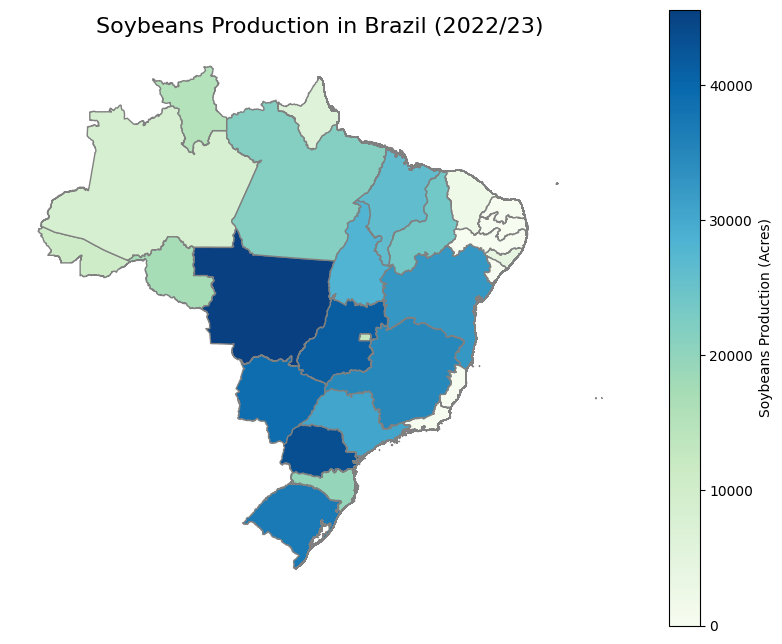

In [35]:
# To then create the map using GeoPandas' plot function (for 2022/23 season only, as the 2023/24 is only an estimate, so far.):
fig, ax = plt.subplots(figsize=(10, 8))
merged_df.plot(column='2022/23', ax=ax, cmap='GnBu', edgecolor='gray')
ax.axis('off')
ax.set_title('Soybeans Production in Brazil (2022/23)', fontsize=16)
fig.colorbar(cm.ScalarMappable
             (norm=plt.Normalize
              (vmin=merged_df['2022/23'].min(), 
               vmax=merged_df['2022/23'].max()), 
              cmap='GnBu'), ax=ax, 
             label='Soybeans Production (Acres)')
plt.show()

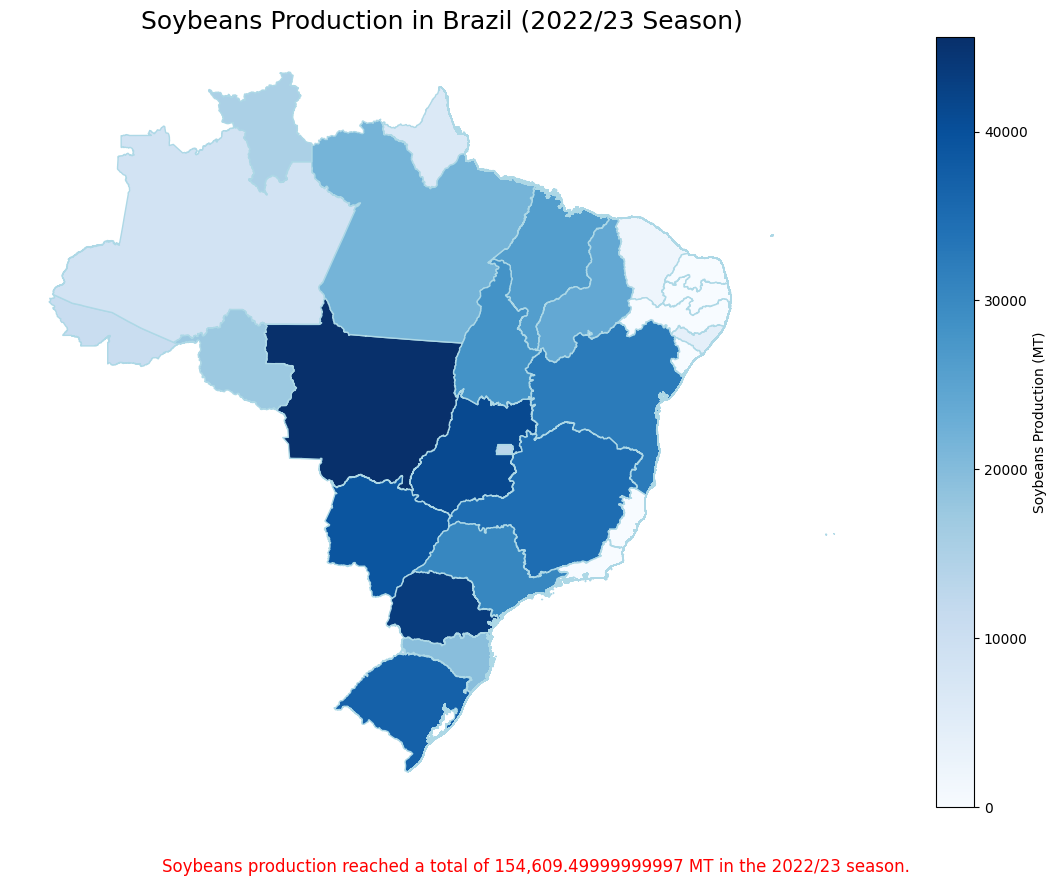

In [36]:
# Now we improve this map:

fig, ax = plt.subplots(figsize=(16, 10))
merged_df.plot(column='2022/23', ax=ax, cmap='Blues', edgecolor='lightblue')
ax.axis('off')
ax.set_title('Soybeans Production in Brazil (2022/23 Season)', fontsize=18)
fig.colorbar(cm.ScalarMappable(
    norm=plt.Normalize(vmin=0, vmax=merged_df['2022/23'].max()),
    cmap='Blues'),
    ax=ax,
    label='Soybeans Production (MT)')

total_prod_sbs = merged_df['2022/23'].sum()

# Format the value with thousands separators:
formatted_total_prod_sbs = f"{total_prod_sbs:,}"  # Use f-string formatting for commas

fig.text(0.3, 0.05, f"Soybeans production reached a total of {formatted_total_prod_sbs} MT in the 2022/23 season.",
         ha='left', va='center', color='red', fontsize=12)

fig1 = fig

plt.show()

In [37]:
# Now we sort these values based on the states with the highest production in the 2022/23 season.
merged_df = merged_df.sort_values(by=['2022/23'], ascending=False)
merged_df

,id,name,geometry,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 Previsão (¹)
10,MT,Mato Grosso,"POLYGON ((-57.60524 -8.66285, -57.59355 -8.707...",MT,32958.9,35884.7,36521.8,41490.2,45600.5,37567.8
15,PR,Paraná,"MULTIPOLYGON (((-48.63069 -25.86792, -48.63069...",PR,16921.5,21598.1,19880.1,12250.3,22384.9,18838.6
8,GO,Goiás,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4...",GO,12097.9,13159.4,15785.9,17389.9,17734.9,15876.9
11,MS,Mato Grosso do Sul,"POLYGON ((-56.10364 -17.17354, -56.08440 -17.1...",MS,9759.7,11362.8,12196.8,8932.7,14054.3,12664.7
20,RS,Rio Grande do Sul,"MULTIPOLYGON (((-52.07069 -32.02847, -52.07069...",RS,19522.2,11443.6,20787.5,9111,13018.4,21887.8
12,MG,Minas Gerais,"POLYGON ((-44.20978 -14.23665, -44.20907 -14.2...",MG,5386.2,6172.4,7021.7,7590.5,8346.5,7644.8
4,BA,Bahia,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",BA,5403.9,6122,6838,7283.1,7717.2,7245.9
24,SP,São Paulo,"MULTIPOLYGON (((-48.08236 -25.28431, -48.08236...",SP,3227.7,3958.7,4299.4,4176.5,4911.4,3955.5
26,TO,Tocantins,"POLYGON ((-48.35310 -5.17391, -48.32085 -5.201...",TO,3153.7,3581.1,3526,3877.1,4809.3,4582
9,MA,Maranhão,"MULTIPOLYGON (((-42.12375 -2.80069, -42.12375 ...",MA,2992.1,3130.3,3285.6,3573.6,3910,4050.5


- Data Extraction - Soybeans

In [38]:
# We extract the merged dataset to an excel file, in case our clients need it for their own purposes:
file_name = 'sbs_origination.xlsx'
merged_df.to_excel(file_name, merge_cells=False, index=False)
print('File Saved Successfully!')

File Saved Successfully!


- Cargo Origination - Maize

Now we do the same exact process with Maize cargo:

In [39]:
maize_df = pd.read_excel(r'F:\Portfolio\Grains Origination - Brazil\MilhoTotalSerieHist.xls', sheet_name='Produção')

In [40]:
maize_df = pd.DataFrame(maize_df)
maize_df = maize_df.iloc[:, [0] + list(range(-6, 0))]
maize_df.dropna(how='any', axis='rows', inplace=True)
maize_df

,Unnamed: 0,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
4,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 Previsão (¹)
5,NORTE,3076.3,3518.7,3516.7,4660.5,5327.3,4938.1
6,RR,78,90,90,90,60.5,54
7,RO,928.2,1004.1,1079.1,1324.9,1572.4,1401
8,AC,82.5,80.2,93,158.2,139,130.2
9,AM,27.5,28.4,23.1,23.8,16.5,15.6
10,AP,1.3,1.4,1.2,2.4,2.6,2.6
11,PA,765.1,834.8,1114.7,1181.5,1486.3,1346.7
12,TO,1193.7,1479.8,1115.6,1879.7,2050,1988
13,NORDESTE,6676.8,8804.6,8788.9,10737,11691.5,9581.4


In [41]:
# Assign the first row to the DataFrame's columns attribute
maize_df.columns = maize_df.iloc[0]

# Remove the first row, which now contains duplicate headers
maize_df = maize_df.iloc[1:]
maize_df

4,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 Previsão (¹)
5,NORTE,3076.3,3518.7,3516.7,4660.5,5327.3,4938.1
6,RR,78,90,90,90,60.5,54
7,RO,928.2,1004.1,1079.1,1324.9,1572.4,1401
8,AC,82.5,80.2,93,158.2,139,130.2
9,AM,27.5,28.4,23.1,23.8,16.5,15.6
10,AP,1.3,1.4,1.2,2.4,2.6,2.6
11,PA,765.1,834.8,1114.7,1181.5,1486.3,1346.7
12,TO,1193.7,1479.8,1115.6,1879.7,2050,1988
13,NORDESTE,6676.8,8804.6,8788.9,10737,11691.5,9581.4
14,MA,1792.5,2196.3,2404.3,2906.4,3143.8,2767.7


In [42]:
maize_df = maize_df.reset_index(drop=True)
maize_df

4,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 Previsão (¹)
0,NORTE,3076.3,3518.7,3516.7,4660.5,5327.3,4938.1
1,RR,78,90,90,90,60.5,54
2,RO,928.2,1004.1,1079.1,1324.9,1572.4,1401
3,AC,82.5,80.2,93,158.2,139,130.2
4,AM,27.5,28.4,23.1,23.8,16.5,15.6
5,AP,1.3,1.4,1.2,2.4,2.6,2.6
6,PA,765.1,834.8,1114.7,1181.5,1486.3,1346.7
7,TO,1193.7,1479.8,1115.6,1879.7,2050,1988
8,NORDESTE,6676.8,8804.6,8788.9,10737,11691.5,9581.4
9,MA,1792.5,2196.3,2404.3,2906.4,3143.8,2767.7


- Geographic Data - Maize

In [43]:
cmap = plt.cm.get_cmap('viridis')  # Choose a colormap you prefer
norm = plt.Normalize(vmin=maize_df['2022/23'].min(), vmax=maize_df['2022/23'].max())

C:\Users\lucas\AppData\Local\Temp\ipykernel_18640\501460477.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap you prefer


In [44]:
merged_maize_df = pd.merge(states_geo, maize_df, left_on='id', right_on='REGIÃO/UF')
merged_maize_df

,id,name,geometry,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 Previsão (¹)
0,AC,Acre,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",AC,82.5,80.2,93,158.2,139,130.2
1,AL,Alagoas,"MULTIPOLYGON (((-35.90153 -9.86181, -35.90153 ...",AL,48.5,61.4,158.7,53.1,145.3,99
2,AP,Amapá,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...",AP,1.3,1.4,1.2,2.4,2.6,2.6
3,AM,Amazonas,"MULTIPOLYGON (((-53.62548 -26.88481, -53.61900...",AM,27.5,28.4,23.1,23.8,16.5,15.6
4,BA,Bahia,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",BA,1630.1,2482.8,2724.3,3373.5,3928.7,2479.8
5,CE,Ceará,"MULTIPOLYGON (((-38.47542 -3.70097, -38.47542 ...",CE,397.5,640,458,521,361.5,554.8
6,DF,Distrito Federal,"POLYGON ((-48.03603 -15.50022, -47.77200 -15.5...",DF,521.1,481.6,366.2,385.1,375.6,347.2
7,ES,Espírito Santo,"MULTIPOLYGON (((-40.88403 -21.16125, -40.88403...",ES,31.9,33.2,35.9,35.2,50.2,41.6
8,GO,Goiás,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4...",GO,11492,12616.9,8431,9744.6,12641.1,9747.9
9,MA,Maranhão,"MULTIPOLYGON (((-42.12375 -2.80069, -42.12375 ...",MA,1792.5,2196.3,2404.3,2906.4,3143.8,2767.7


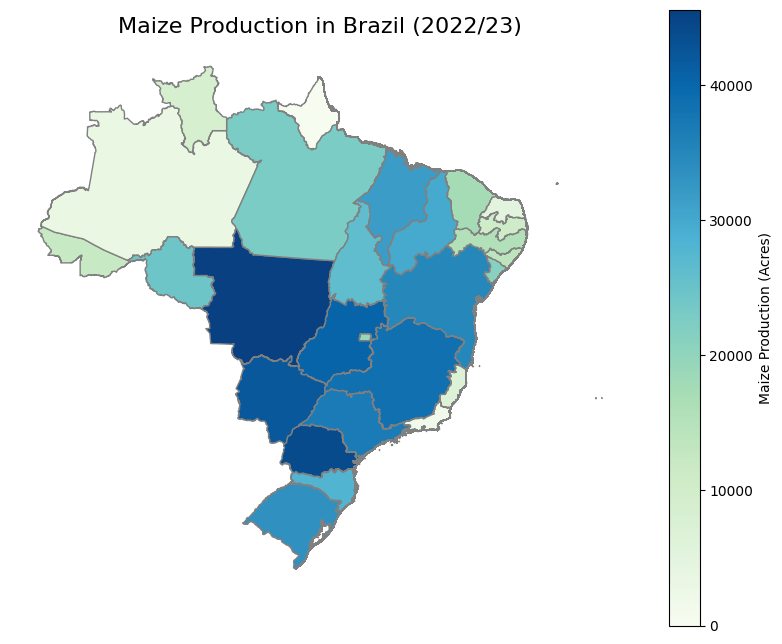

In [45]:
# Create the map using GeoPandas' plot function:
fig, ax = plt.subplots(figsize=(10, 8))
merged_maize_df.plot(column='2022/23', ax=ax, cmap='GnBu', edgecolor='gray')
ax.axis('off')
ax.set_title('Maize Production in Brazil (2022/23)', fontsize=16)
fig.colorbar(cm.ScalarMappable
             (norm=plt.Normalize
              (vmin=merged_df['2022/23'].min(), 
               vmax=merged_df['2022/23'].max()), 
              cmap='GnBu'), ax=ax, 
             label='Maize Production (Acres)')
plt.show()

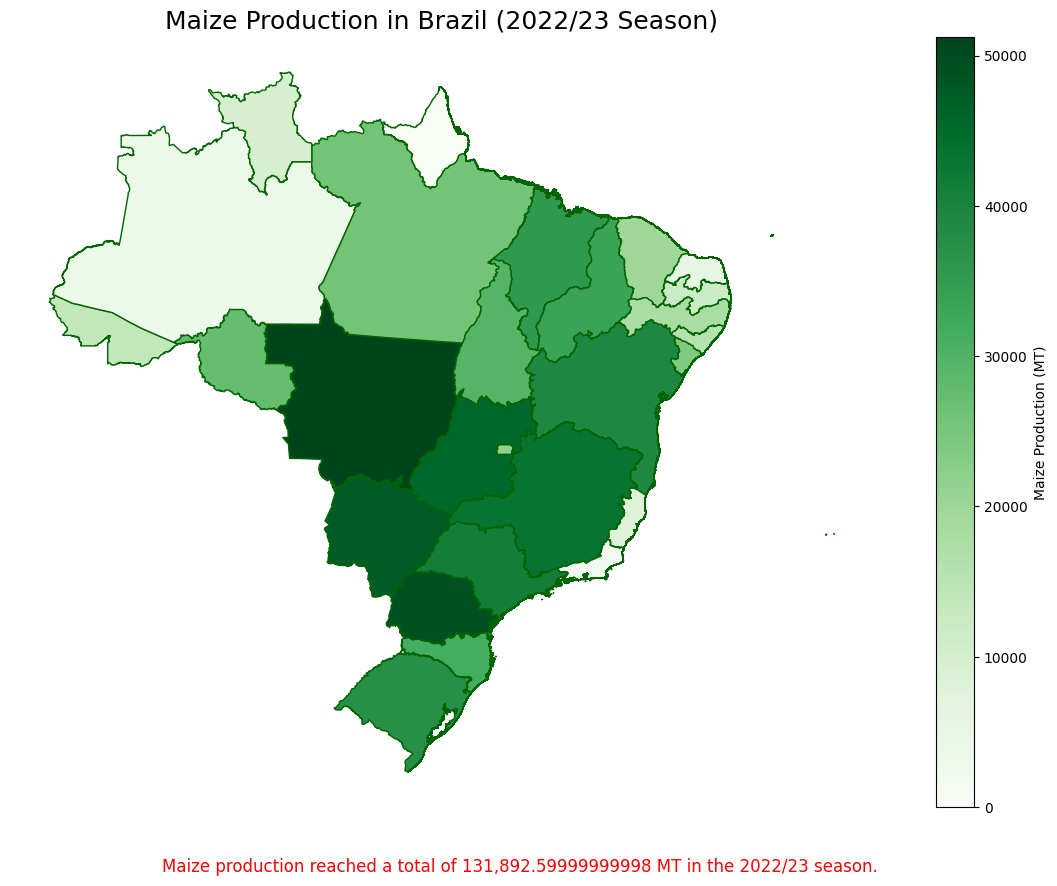

In [46]:
fig, ax = plt.subplots(figsize=(16, 10))
merged_maize_df.plot(column='2022/23', ax=ax, cmap='Greens', edgecolor='darkgreen')
ax.axis('off')
ax.set_title('Maize Production in Brazil (2022/23 Season)', fontsize=18)
#fig.suptitle('Maize Production in Brazil (2022/23 Season)', fontsize=18)  # Main title
#ax.set_title('Sources: National Supply Company (CONAB) and Alphamar.', fontsize=14)
fig.colorbar(cm.ScalarMappable(
    norm=plt.Normalize(vmin=0, vmax=merged_maize_df['2022/23'].max()),
    cmap='Greens'),
    ax=ax,
    label='Maize Production (MT)')

total_prod_maize = merged_maize_df['2022/23'].sum()

# Format the value with thousands separators:
formatted_total_prod_maize = f"{total_prod_maize:,}"  # Use f-string formatting for commas

fig.text(0.3, 0.05, f"Maize production reached a total of {formatted_total_prod_maize} MT in the 2022/23 season.",
         ha='left', va='center', color='red', fontsize=12)

fig2 = fig

plt.show()

In [47]:
merged_maize_df = merged_maize_df.sort_values(by=['2022/23'], ascending=False)
merged_maize_df

,id,name,geometry,REGIÃO/UF,2018/19,2019/20,2020/21,2021/22,2022/23,2023/24 Previsão (¹)
10,MT,Mato Grosso,"POLYGON ((-57.60524 -8.66285, -57.59355 -8.707...",MT,31307.2,34954.5,33243.9,41620.1,51240.6,42974.3
15,PR,Paraná,"MULTIPOLYGON (((-48.63069 -25.86792, -48.63069...",PR,16667.9,14947.8,9614.2,16421.6,18509.2,16362.6
11,MS,Mato Grosso do Sul,"POLYGON ((-56.10364 -17.17354, -56.08440 -17.1...",MS,9505.6,8783,6429,12460.3,13112.2,10586.4
8,GO,Goiás,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4...",GO,11492,12616.9,8431,9744.6,12641.1,9747.9
12,MG,Minas Gerais,"POLYGON ((-44.20978 -14.23665, -44.20907 -14.2...",MG,7534.2,7524.3,7024.6,7682.6,7942.1,6669
24,SP,São Paulo,"MULTIPOLYGON (((-48.08236 -25.28431, -48.08236...",SP,4583.7,4202.9,3270.8,4329.9,4715.4,3889
4,BA,Bahia,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",BA,1630.1,2482.8,2724.3,3373.5,3928.7,2479.8
20,RS,Rio Grande do Sul,"MULTIPOLYGON (((-52.07069 -32.02847, -52.07069...",RS,5768.1,3935.6,4390.1,2900.8,3731.8,5236
9,MA,Maranhão,"MULTIPOLYGON (((-42.12375 -2.80069, -42.12375 ...",MA,1792.5,2196.3,2404.3,2906.4,3143.8,2767.7
17,PI,Piauí,"POLYGON ((-41.81681 -2.74375, -41.81681 -2.744...",PI,1844.4,2195.2,2096,2750,2892,2502


- Data Extraction - Maize

In [48]:
file_name = 'maize_origination.xlsx'
merged_maize_df.to_excel(file_name, merge_cells=False, index=False)
print('File Saved Successfully!')

File Saved Successfully!


- Exporting to PDF

In [49]:
# We finally export our two maps to PDF file:

pdf = PdfPages('Grains Origination Report - Maps.pdf')
figures = [f"fig{i}" for i in range(1, 3)]

# Iterate through the figure names and access the corresponding objects
for fig_name in figures:
    fig = eval(fig_name)  # Access the figure object using its name
    pdf.savefig(fig, dpi=300)
    plt.close(fig)  # Close the figure to clear memory
    
pdf.close()
print('File ready')

File ready
